In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
from scipy.stats import linregress
import seaborn as sns
from matplotlib.dates import DateFormatter
%matplotlib notebook

In [2]:
# Read CSV
cases_data = pd.read_csv('covid19cases_test.csv')
vaccine_data= pd.read_csv('covid19vaccinesbycounty.csv')


In [3]:
ca_counties_cases_csv = "covid19cases_test.csv"

# Import us counties 
ca_counties_cases_df = pd.read_csv(ca_counties_cases_csv, encoding="utf-8")
ca_counties_cases_df.sort_values(by = 'area', ascending = True)

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,NaN
22814,2/9/2021,Alameda,County,1685886.0,267.0,9.0,14435.0,389.0,283.0,12.0,7612.0
4819,4/20/2020,Alameda,County,1685886.0,51.0,2.0,746.0,54.0,47.0,1.0,NaN
3843,4/4/2020,Alameda,County,1685886.0,36.0,1.0,269.0,26.0,73.0,1.0,NaN
23790,2/25/2021,Alameda,County,1685886.0,123.0,6.0,10818.0,172.0,111.0,11.0,9250.0
...,...,...,...,...,...,...,...,...,...,...,...
14700,9/28/2020,Yuba,County,79290.0,10.0,0.0,195.0,10.0,3.0,0.0,124.0
8844,6/24/2020,Yuba,County,79290.0,3.0,0.0,117.0,2.0,2.0,0.0,121.0
18787,12/4/2020,Yuba,County,79290.0,68.0,0.0,380.0,76.0,43.0,0.0,263.0
914,2/15/2020,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
#California counties vaccination rates by day with demographic
ca_covid_csv = "covid19vaccinesbycountybydemographic.csv"
ca_covid_df = pd.read_csv(ca_covid_csv, encoding="utf-8")
ca_covid_df

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/26/2021,276.0,12830.0,64.0,2949.0,276.0,15779.0,352091.0,25076.0,False
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/25/2021,361.0,12618.0,41.0,2885.0,361.0,15503.0,352367.0,25352.0,False
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/24/2021,738.0,12298.0,127.0,2844.0,738.0,15142.0,352728.0,25713.0,False
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/23/2021,814.0,11687.0,165.0,2717.0,814.0,14404.0,353466.0,26451.0,False
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/22/2021,708.0,11038.0,202.0,2552.0,708.0,13590.0,354280.0,27265.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133394,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/19/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133395,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/18/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133396,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/17/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133397,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/16/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False


In [5]:
ca_counties_cases_df.head()

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,NaN
1,2/1/2020,Alpine,County,1117.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2/1/2020,Amador,County,38531.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2/1/2020,Butte,County,217769.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2/1/2020,Calaveras,County,44289.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
ca_counties_cases_df.columns

Index(['date', 'area', 'area_type', 'population', 'cases', 'deaths',
       'total_tests', 'positive_tests', 'reported_cases', 'reported_deaths',
       'reported_tests'],
      dtype='object')

In [7]:
organized_cases = ca_counties_cases_df[["date", "area", "cases", "deaths", "area_type", "date", "population", "total_tests", "positive_tests", "reported_cases", "reported_deaths", "reported_tests"]]
organized_cases

,date,area,cases,deaths,area_type,date,population,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2/1/2020,Alameda,3.0,0.0,County,2/1/2020,1685886.0,4.0,0.0,0.0,0.0,NaN
1,2/1/2020,Alpine,0.0,0.0,County,2/1/2020,1117.0,0.0,0.0,0.0,0.0,NaN
2,2/1/2020,Amador,0.0,0.0,County,2/1/2020,38531.0,0.0,0.0,0.0,0.0,NaN
3,2/1/2020,Butte,0.0,0.0,County,2/1/2020,217769.0,0.0,0.0,0.0,0.0,NaN
4,2/1/2020,Calaveras,0.0,0.0,County,2/1/2020,44289.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
27628,4/28/2021,Tuolumne,0.0,0.0,County,4/28/2021,52351.0,NaN,NaN,1.0,0.0,153.0
27629,4/28/2021,Unknown,0.0,0.0,County,4/28/2021,NaN,NaN,NaN,-15.0,0.0,52.0
27630,4/28/2021,Ventura,0.0,0.0,County,4/28/2021,852747.0,NaN,NaN,20.0,0.0,4119.0
27631,4/28/2021,Yolo,0.0,0.0,County,4/28/2021,223612.0,NaN,NaN,24.0,0.0,857.0


In [8]:
clean_cases = organized_cases.groupby(["area"]).sum()
clean_cases

,cases,deaths,population,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
area,,,,,,,,
Alameda,86386.0,1259.0,763706358.0,2495045.0,100750.0,86390.0,1260.0,2121033.0
Alpine,88.0,0.0,506001.0,1951.0,37.0,88.0,0.0,953.0
Amador,3645.0,46.0,17454543.0,114775.0,4181.0,3646.0,46.0,68403.0
Butte,11762.0,196.0,98649357.0,210852.0,12462.0,11762.0,196.0,183515.0
Calaveras,2078.0,50.0,20062917.0,39812.0,2333.0,2078.0,50.0,31018.0
...,...,...,...,...,...,...,...,...
Tuolumne,4029.0,53.0,23715003.0,95465.0,4683.0,4029.0,58.0,61501.0
Unknown,38.0,0.0,0.0,6373.0,44.0,38.0,0.0,553520.0
Ventura,80168.0,987.0,386294391.0,1356528.0,97432.0,80172.0,1000.0,1289568.0


In [9]:
clean_cases.count()

cases              61
deaths             61
population         61
total_tests        61
positive_tests     61
reported_cases     61
reported_deaths    61
reported_tests     61
dtype: int64

In [10]:
rate_table = clean_cases.pct_change(periods=1, fill_method='pad',limit=None, freq=None)
rate_table

,cases,deaths,population,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
area,,,,,,,,
Alameda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alpine,-0.998981,-1.000000,-0.999337,-0.999218,-0.999633,-0.998981,-1.000000,-0.999551
Amador,40.420455,inf,33.495076,57.828806,112.000000,40.431818,inf,70.776495
Butte,2.226886,3.260870,4.651787,0.837090,1.980627,2.226001,3.260870,1.682850
Calaveras,-0.823329,-0.744898,-0.796624,-0.811185,-0.812791,-0.823329,-0.744898,-0.830978
...,...,...,...,...,...,...,...,...
Tuolumne,-0.917359,-0.936298,-0.891931,-0.821181,-0.915974,-0.917361,-0.930288,-0.862733
Unknown,-0.990568,-1.000000,-1.000000,-0.933243,-0.990604,-0.990568,-1.000000,8.000179
Ventura,2108.684211,inf,inf,211.855484,2213.363636,2108.789474,inf,1.329759


In [11]:
total_death = clean_cases['deaths'].sum()
print(total_death)

120254.0


In [12]:
pos_tests = clean_cases['positive_tests'].sum()
print(pos_tests)

8718498.0


<IPython.core.display.Javascript object>


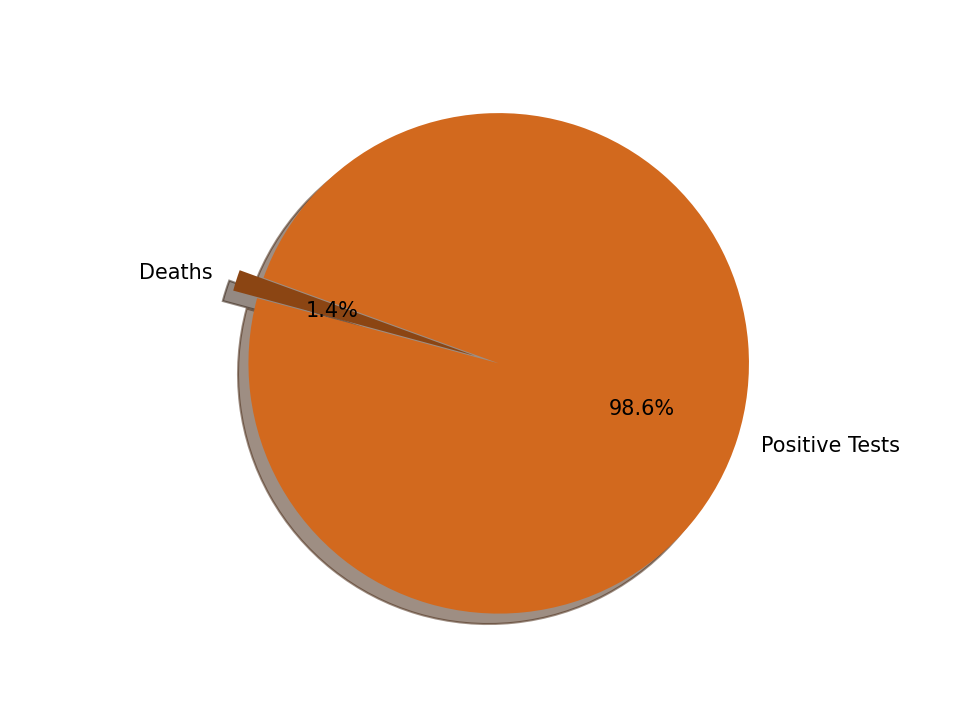

In [13]:
labels = ["Deaths", "Positive Tests"]
values = ["120254", "8718498"]
colors = ["saddlebrown", "chocolate"]
explode = (0.1, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True,startangle=160)
plt.axis("equal")

plt.savefig("circle.png")
plt.show()

In [14]:
#Compare DEATHS/CASE %change by county
# Formula =  new-old / old * 100

ca_case_rate = -((clean_cases['reported_cases'] - clean_cases['reported_tests']) / (clean_cases['reported_tests'])) * 100
ca_case_rate

area
Alameda      95.926985
Alpine       90.766002
Amador       94.669824
Butte        93.590715
Calaveras    93.300664
               ...    
Tuolumne     93.448887
Unknown      99.993135
Ventura      93.783034
Yolo         96.343787
Yuba         90.274157
Length: 61, dtype: float64

In [15]:
#Compare DEATHS %Rate by county
# Formula = old - new / old * 100

ca_death_rate = -((clean_cases['reported_deaths'] - clean_cases['total_tests']) / (clean_cases['total_tests'])) * 100
ca_death_rate

area
Alameda       99.949500
Alpine       100.000000
Amador        99.959922
Butte         99.907044
Calaveras     99.874410
                ...    
Tuolumne      99.939245
Unknown      100.000000
Ventura       99.926282
Yolo          99.949059
Yuba          99.934099
Length: 61, dtype: float64

In [16]:
#sort by administered date
ca_covid_df.sort_values(by = 'administered_date', ascending = False)
ca_covid_df

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/26/2021,276.0,12830.0,64.0,2949.0,276.0,15779.0,352091.0,25076.0,False
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/25/2021,361.0,12618.0,41.0,2885.0,361.0,15503.0,352367.0,25352.0,False
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/24/2021,738.0,12298.0,127.0,2844.0,738.0,15142.0,352728.0,25713.0,False
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/23/2021,814.0,11687.0,165.0,2717.0,814.0,14404.0,353466.0,26451.0,False
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/22/2021,708.0,11038.0,202.0,2552.0,708.0,13590.0,354280.0,27265.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133394,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/19/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133395,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/18/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133396,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/17/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133397,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/16/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False


In [17]:
print(ca_counties_cases_df)

            date       area area_type  population  cases  deaths  total_tests  \
0       2/1/2020    Alameda    County   1685886.0    3.0     0.0          4.0   
1       2/1/2020     Alpine    County      1117.0    0.0     0.0          0.0   
2       2/1/2020     Amador    County     38531.0    0.0     0.0          0.0   
3       2/1/2020      Butte    County    217769.0    0.0     0.0          0.0   
4       2/1/2020  Calaveras    County     44289.0    0.0     0.0          0.0   
...          ...        ...       ...         ...    ...     ...          ...   
27628  4/28/2021   Tuolumne    County     52351.0    0.0     0.0          NaN   
27629  4/28/2021    Unknown    County         NaN    0.0     0.0          NaN   
27630  4/28/2021    Ventura    County    852747.0    0.0     0.0          NaN   
27631  4/28/2021       Yolo    County    223612.0    0.0     0.0          NaN   
27632  4/28/2021       Yuba    County     79290.0    0.0     0.0          NaN   

       positive_tests  repo

In [18]:
ca_covid_test = ca_covid_df.groupby(['county']).mean()
ca_covid_test

,est_population,est_age_16plus_pop,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
county,,,,,,,,,,,
Alameda,3.343721e+05,2.701780e+05,1091.777532,25665.690402,780.187970,30294.338788,1203.324635,5.596003e+04,2.742267e+05,2.100327e+05,0.000000
Alpine,2.600000e+02,2.220000e+02,1.527820,45.565414,1.154135,51.320301,1.535338,9.688571e+01,3.596867e+02,3.098534e+02,0.411765
Amador,8.804462e+03,7.607846e+03,21.975674,779.851835,13.175144,540.255639,22.806280,1.320107e+03,7.161189e+03,5.964574e+03,0.000000
Butte,4.856850e+04,3.958450e+04,96.191066,2585.203892,79.511720,3592.714728,102.490933,6.177919e+03,4.132729e+04,3.234329e+04,0.000000
Calaveras,8.877867e+03,7.643267e+03,22.117205,624.301636,15.246793,659.306502,22.899602,1.283608e+03,7.594387e+03,6.359787e+03,0.000000
Colusa,5.166692e+03,3.904538e+03,9.574718,265.067669,6.778195,244.145677,10.375940,5.092133e+02,4.978123e+03,3.611789e+03,0.058824
Contra Costa,2.302737e+05,1.863467e+05,790.182220,19344.586908,579.918620,22529.677134,836.911986,4.187426e+04,1.851425e+05,1.412168e+05,0.000000
Del Norte,6.241000e+03,5.023077e+03,10.554041,280.486842,7.968985,314.116541,11.320959,5.946034e+02,6.001503e+03,4.682086e+03,0.058824
El Dorado,4.047693e+04,3.406336e+04,95.053958,2565.314020,71.942061,3025.416188,100.684211,5.590730e+03,3.399375e+04,2.758057e+04,0.000000


In [19]:
#Compare Vaccination %Rate by county
# Formula = old - new / old * 100

ca_covid_rate = ((ca_covid_test['cumulative_unvax_total_pop'] - ca_covid_test['fully_vaccinated']) / (ca_covid_test['cumulative_unvax_total_pop'])) * 100
ca_covid_rate 

county
Alameda            99.715495
Alpine             99.679128
Amador             99.816020
Butte              99.807605
Calaveras          99.799236
Colusa             99.863840
Contra Costa       99.686772
Del Norte          99.867217
El Dorado          99.788367
Fresno             99.805376
Glenn              99.843732
Humboldt           99.783681
Imperial           99.854261
Inyo               99.757336
Kern               99.845117
Kings              99.895902
Lake               99.805643
Lassen             99.886181
Los Angeles        99.772391
Madera             99.827816
Marin              99.634141
Mariposa           99.876721
Mendocino          99.724938
Merced             99.884320
Modoc              99.836678
Mono               99.593939
Monterey           99.780893
Napa               99.694059
Nevada             99.788033
Orange             99.754339
Placer             99.764299
Plumas             99.766283
Riverside          99.831347
Sacramento         99.792612
San Ben

In [20]:
#Run for Question 3
ca_rate_comp = pd.DataFrame({"Cases":ca_case_rate, "Deaths":ca_death_rate, "Vaccinations": ca_covid_rate})
ca_rate_comp.head(61)

,Cases,Deaths,Vaccinations
Alameda,95.926985,99.949500,99.715495
Alpine,90.766002,100.000000,99.679128
Amador,94.669824,99.959922,99.816020
Butte,93.590715,99.907044,99.807605
Calaveras,93.300664,99.874410,99.799236
...,...,...,...
Tulare,89.118334,99.844155,99.826991
Tuolumne,93.448887,99.939245,99.789584
Unknown,99.993135,100.000000,NaN
Ventura,93.783034,99.926282,99.744547


In [21]:
ca_rate_comp['Cases']

Alameda      95.926985
Alpine       90.766002
Amador       94.669824
Butte        93.590715
Calaveras    93.300664
               ...    
Tuolumne     93.448887
Unknown      99.993135
Ventura      93.783034
Yolo         96.343787
Yuba         90.274157
Name: Cases, Length: 62, dtype: float64

In [22]:
ca_rate_comp['Deaths']

Alameda       99.949500
Alpine       100.000000
Amador        99.959922
Butte         99.907044
Calaveras     99.874410
                ...    
Tuolumne      99.939245
Unknown      100.000000
Ventura       99.926282
Yolo          99.949059
Yuba          99.934099
Name: Deaths, Length: 62, dtype: float64

<IPython.core.display.Javascript object>


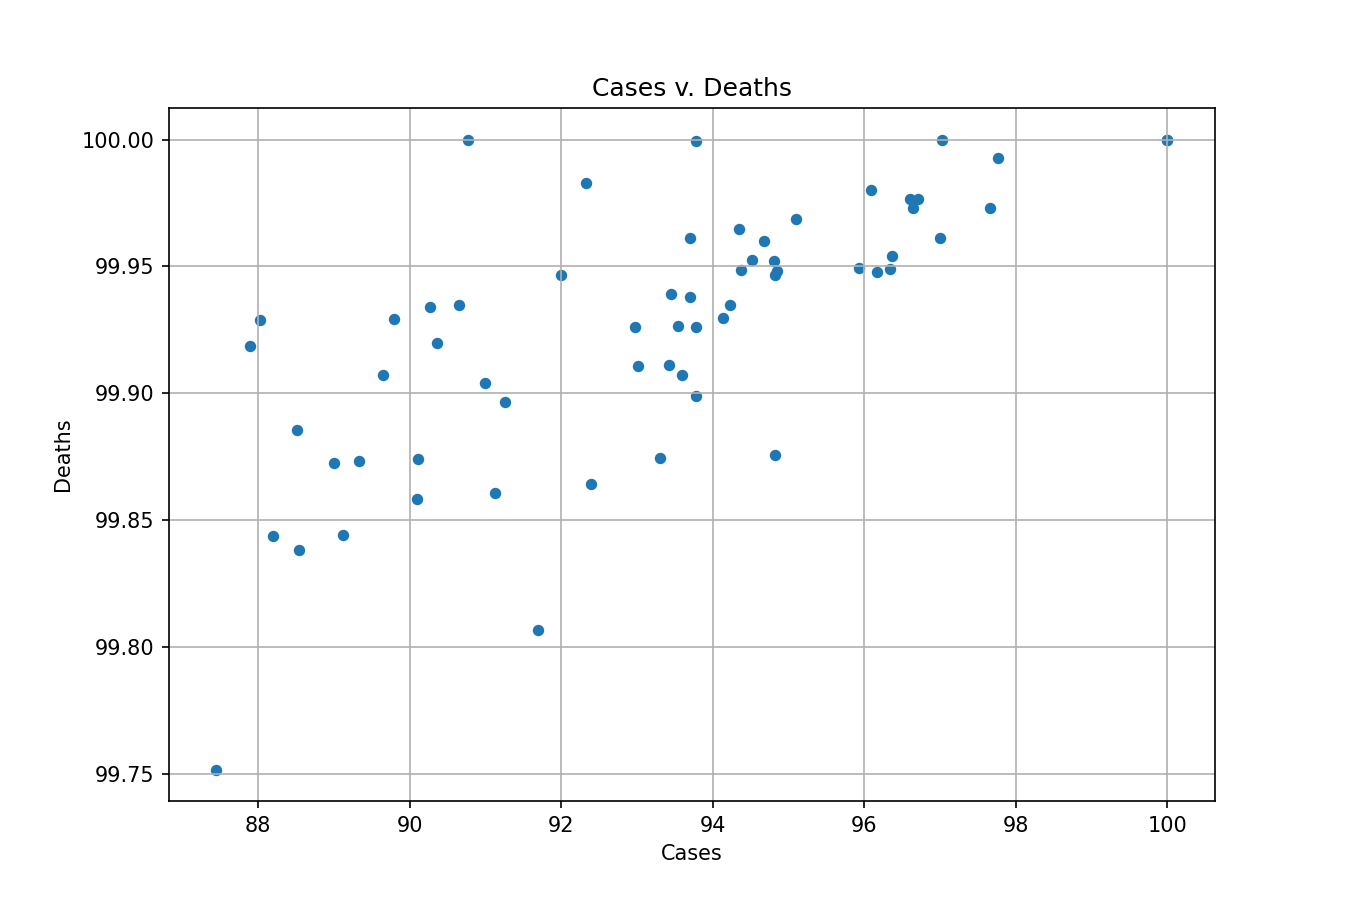

In [23]:
cases_deaths_df = ca_rate_comp[['Cases','Deaths']]


# Question 3 Scatter plot 1


cases_deaths_df.plot.scatter(x='Cases', y='Deaths', grid=True, figsize=(9,6), title="Cases v. Deaths")

#save image and show plot

plt.savefig("jessica.png")
plt.show()

In [24]:
#end of question 1

In [25]:
Ca_counties_vax_demo_csv = "covid19vaccinesbycountybydemographic.csv"

ca_counties_vaxdemo_df = pd.read_csv(Ca_counties_vax_demo_csv, encoding="utf-8")
ca_counties_vaxdemo_df['administered_date']=pd.to_datetime(ca_counties_vaxdemo_df['administered_date'])
ca_counties_vaxdemo_df.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-26,276.0,12830.0,64.0,2949.0,276.0,15779.0,352091.0,25076.0,False
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-25,361.0,12618.0,41.0,2885.0,361.0,15503.0,352367.0,25352.0,False
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-24,738.0,12298.0,127.0,2844.0,738.0,15142.0,352728.0,25713.0,False
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-23,814.0,11687.0,165.0,2717.0,814.0,14404.0,353466.0,26451.0,False
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-22,708.0,11038.0,202.0,2552.0,708.0,13590.0,354280.0,27265.0,False


In [26]:
ca_counties_vaxdemo_df = ca_counties_vaxdemo_df.sort_values(["county", "administered_date"], ascending = (True, True))
ca_counties_vaxdemo_df.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
132,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,367870.0,40855.0,False
265,Alameda,MIXED,Age Group,18-49,709483.0,709483.0,2020-12-15,28.0,28.0,0.0,0.0,28.0,28.0,709455.0,709455.0,False
398,Alameda,MIXED,Age Group,50-64,315856.0,315856.0,2020-12-15,6.0,6.0,0.0,0.0,6.0,6.0,315850.0,315850.0,False
531,Alameda,MIXED,Age Group,65+,285108.0,285108.0,2020-12-15,2.0,2.0,0.0,0.0,2.0,2.0,285106.0,285106.0,False
664,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,4920.0,3962.0,False


In [27]:
##Input California County Name
## When entering county name. First letter needs to be captialized, for example Orange or Los Angeles
county2 = input("Enter a California County Name? ")

Enter a California County Name? Orange


Question 2: How does vaccination affect the case/death rate? us_covid_df will give us the baseline for our comparison, we need data to show improvement 


In [28]:
county = ca_counties_vaxdemo_df.loc[ca_counties_vaxdemo_df["county"]==county2]
county
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "American Indian or Alaska Native"]
demo.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
66233,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,6908.0,5543.0,False
66232,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-16,1.0,1.0,0.0,0.0,1.0,1.0,6907.0,5542.0,False
66231,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-17,7.0,8.0,0.0,0.0,7.0,8.0,6900.0,5535.0,False
66230,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-18,11.0,19.0,0.0,0.0,11.0,19.0,6889.0,5524.0,False
66229,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-19,1.0,20.0,0.0,0.0,1.0,20.0,6888.0,5523.0,False


In [29]:
# Merge Cases and Vaccine Dataset
vaccine_data = vaccine_data.rename(columns={"administered_date": "date"})

merge_data = pd.merge(cases_data, vaccine_data, 
                   on='date', 
                   how='left')
  
# displaying result
merge_data

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,...,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2020,Alpine,County,1117.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2020,Amador,County,38531.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/1/2020,Butte,County,217769.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/1/2020,Calaveras,County,44289.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504221,4/28/2021,Tuolumne,County,52351.0,0.0,0.0,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504222,4/28/2021,Unknown,County,NaN,0.0,0.0,NaN,NaN,-15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504223,4/28/2021,Ventura,County,852747.0,0.0,0.0,NaN,NaN,20.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504224,4/28/2021,Yolo,County,223612.0,0.0,0.0,NaN,NaN,24.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Import California counties Cases Dataset
ca_counties_cases_csv = "covid19cases_test.csv" 
ca_counties_cases_df = pd.read_csv(ca_counties_cases_csv, encoding="utf-8")
ca_counties_cases_df.sort_values(by = 'area', ascending = True)

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,NaN
22814,2/9/2021,Alameda,County,1685886.0,267.0,9.0,14435.0,389.0,283.0,12.0,7612.0
4819,4/20/2020,Alameda,County,1685886.0,51.0,2.0,746.0,54.0,47.0,1.0,NaN
3843,4/4/2020,Alameda,County,1685886.0,36.0,1.0,269.0,26.0,73.0,1.0,NaN
23790,2/25/2021,Alameda,County,1685886.0,123.0,6.0,10818.0,172.0,111.0,11.0,9250.0
...,...,...,...,...,...,...,...,...,...,...,...
14700,9/28/2020,Yuba,County,79290.0,10.0,0.0,195.0,10.0,3.0,0.0,124.0
8844,6/24/2020,Yuba,County,79290.0,3.0,0.0,117.0,2.0,2.0,0.0,121.0
18787,12/4/2020,Yuba,County,79290.0,68.0,0.0,380.0,76.0,43.0,0.0,263.0
914,2/15/2020,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [31]:
# Import California counties Vaccination Dataset
ca_counties_vaccine_csv = "covid19vaccinesbycounty.csv"
ca_counties_vaccine_df = pd.read_csv(ca_counties_vaccine_csv, encoding="utf-8")
ca_counties_vaccine_df.sort_values(by = 'county', ascending = True)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
654,Alameda,4/26/2021,7800,1419774,5459,838194,2331,497177,10,84403,4872,320176,2910,590911,4889,911087,California
557,Alameda,1/19/2021,5521,82182,3329,49891,2192,32291,0,0,4334,55177,1185,13496,4336,68673,California
558,Alameda,1/20/2021,6691,88873,4026,53917,2665,34956,0,0,5398,59298,1281,14777,5402,74075,California
559,Alameda,1/21/2021,7741,96614,3382,57299,4359,39315,0,0,6913,65392,822,15599,6916,80991,California
560,Alameda,1/22/2021,6838,103452,2032,59331,4806,44121,0,0,5700,69963,1131,16730,5702,86693,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,Yuba,1/22/2021,103,2534,6,1195,97,1339,0,0,94,1859,9,338,94,2197,California
7850,Yuba,1/21/2021,210,2431,95,1189,115,1242,0,0,202,1774,8,329,202,2103,California
7849,Yuba,1/20/2021,132,2221,87,1094,45,1127,0,0,109,1580,23,321,109,1901,California
7847,Yuba,1/18/2021,60,2009,32,978,28,1031,0,0,35,1444,25,283,35,1727,California


In [32]:
# Input California County Name
#county2 = input("County Name? ")

In [33]:
# Sort Cases Dataset By Date
ca_counties_cases_df = ca_counties_cases_df.loc[ca_counties_cases_df["area"]== county2]
ca_counties_cases_df.sort_values(by = 'date', ascending = False)


,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
13511,9/9/2020,Orange,County,3228519.0,140.0,2.0,9987.0,218.0,180.0,10.0,2871.0
13450,9/8/2020,Orange,County,3228519.0,170.0,5.0,9230.0,293.0,82.0,2.0,3680.0
13389,9/7/2020,Orange,County,3228519.0,111.0,2.0,2249.0,84.0,201.0,0.0,5970.0
13328,9/6/2020,Orange,County,3228519.0,103.0,9.0,2440.0,90.0,205.0,3.0,6992.0
13267,9/5/2020,Orange,County,3228519.0,123.0,9.0,2910.0,143.0,238.0,8.0,8054.0
...,...,...,...,...,...,...,...,...,...,...,...
21197,1/13/2021,Orange,County,3228519.0,2386.0,50.0,26676.0,3243.0,2898.0,30.0,18283.0
21136,1/12/2021,Orange,County,3228519.0,2648.0,48.0,31588.0,3999.0,1920.0,29.0,22915.0
21075,1/11/2021,Orange,County,3228519.0,2745.0,56.0,30722.0,3723.0,2574.0,9.0,22138.0
21014,1/10/2021,Orange,County,3228519.0,1476.0,57.0,7996.0,1353.0,2762.0,70.0,24031.0


In [34]:
# Sort Vaccination Dataset By Date
ca_counties_vaccine_df = ca_counties_vaccine_df.loc[ca_counties_vaccine_df["county"]==county2]
ca_counties_vaccine_df.sort_values(by = 'administered_date', ascending = False)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
4305,Orange,4/9/2021,40218,1877823,23473,982194,11714,837996,5031,57633,17845,539683,22289,696538,22862,1236221,California
4304,Orange,4/8/2021,38214,1837605,21281,958721,11611,826282,5322,52602,18711,539110,19415,674249,24013,1213359,California
4303,Orange,4/7/2021,35612,1799391,19948,937440,11235,814671,4429,47280,15745,534512,19797,654834,20156,1189346,California
4302,Orange,4/6/2021,33018,1763779,15495,917492,14218,803436,3305,42851,14334,534153,18603,635037,17629,1169190,California
4301,Orange,4/5/2021,29250,1730761,13875,901997,12151,789218,3224,39546,13787,535127,15408,616434,17005,1151561,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,Orange,1/13/2021,10224,111824,4899,72435,5325,39389,0,0,7026,68818,3194,21493,7033,90311,California
4218,Orange,1/12/2021,8803,101600,4718,67536,4085,34064,0,0,5339,64979,3462,18299,5340,83278,California
4217,Orange,1/11/2021,9429,92797,4895,62818,4534,29979,0,0,5812,63101,3620,14837,5813,77938,California
4216,Orange,1/10/2021,4231,83368,1041,57923,3190,25445,0,0,3351,60908,879,11217,3355,72125,California


In [35]:
## ca_counties_cases_df['area']


<IPython.core.display.Javascript object>


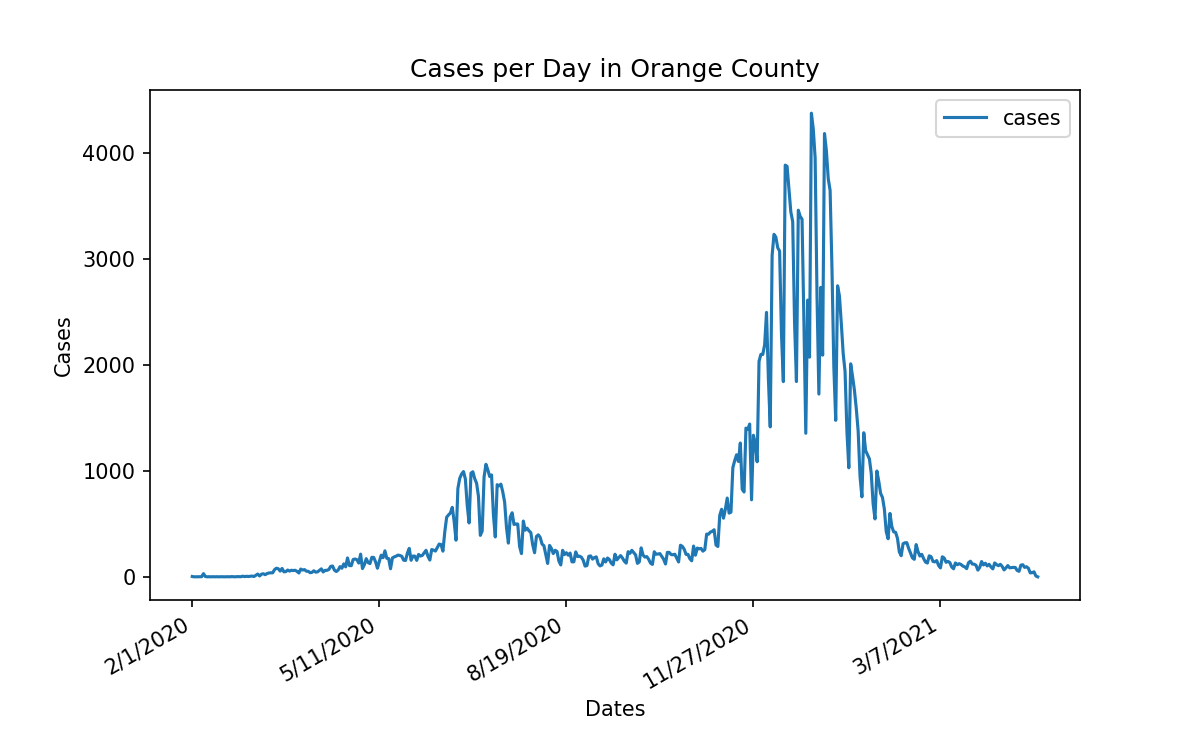

In [36]:
# 
cases_plot = ca_counties_cases_df.plot('date', 'cases',kind="line", figsize=(8,5))
plt.title(f"Cases per Day in {county2} County")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.gcf().autofmt_xdate()
plt.show()



<IPython.core.display.Javascript object>


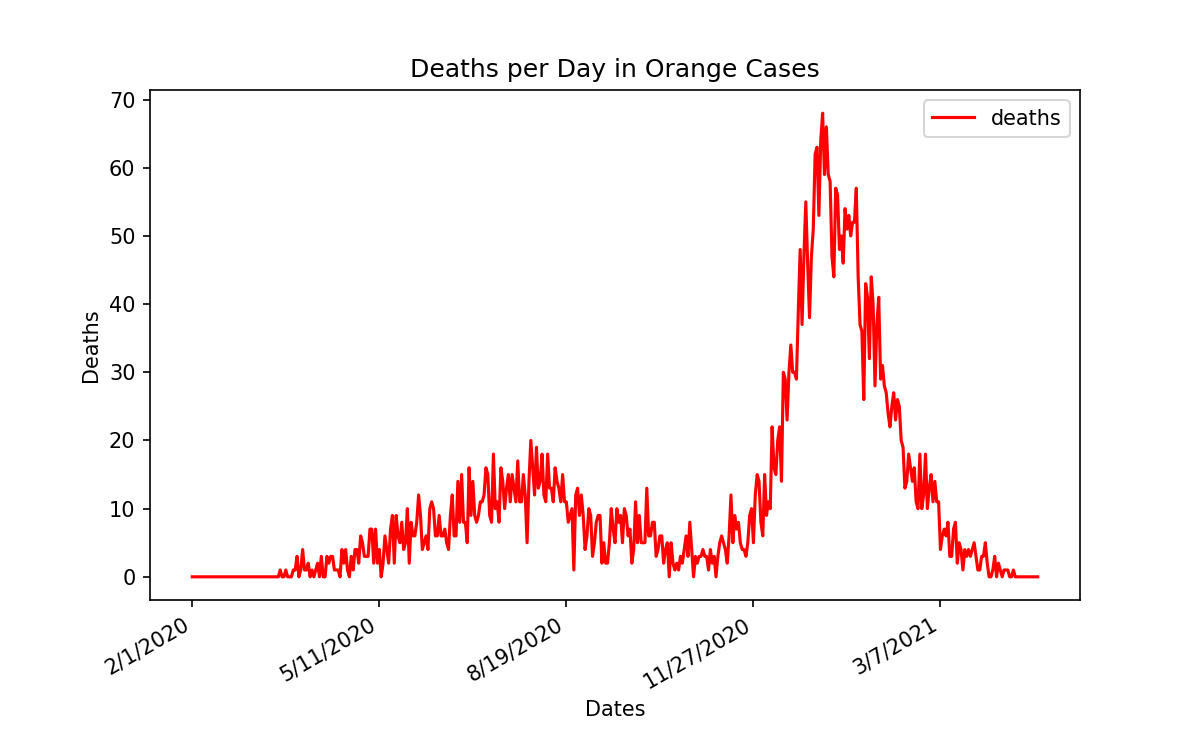

In [37]:
deaths_plot = ca_counties_cases_df.plot('date', 'deaths',kind="line", color="red", figsize=(8,5))
plt.title(f"Deaths per Day in {county2} Cases")
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

<IPython.core.display.Javascript object>


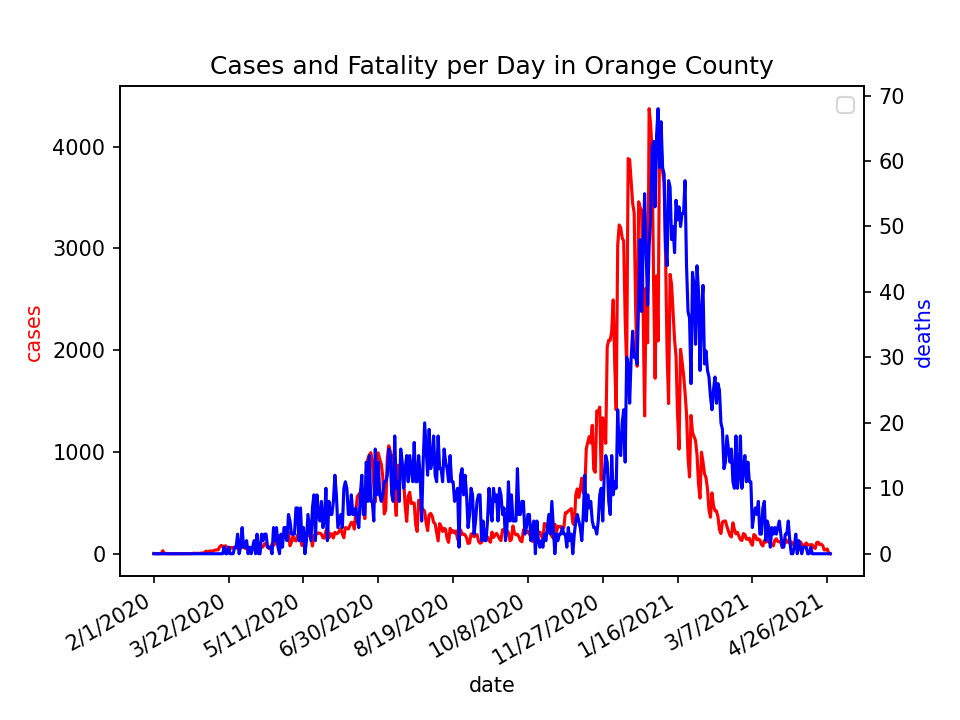

No handles with labels found to put in legend.


In [39]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ca_counties_cases_df.date, ca_counties_cases_df.cases, color="red")
# set x-axis label
ax.set_xlabel("date")
# set y-axis label
ax.set_ylabel("cases",color="red")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ca_counties_cases_df.date, ca_counties_cases_df["deaths"],color="blue")
ax2.set_ylabel("deaths",color="blue")

plt.xticks(rotation=70)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gcf().autofmt_xdate()

plt.title(f"Cases and Fatality per Day in {county2} County")
plt.legend()
plt.xticks(rotation=70)
plt.show()




<IPython.core.display.Javascript object>


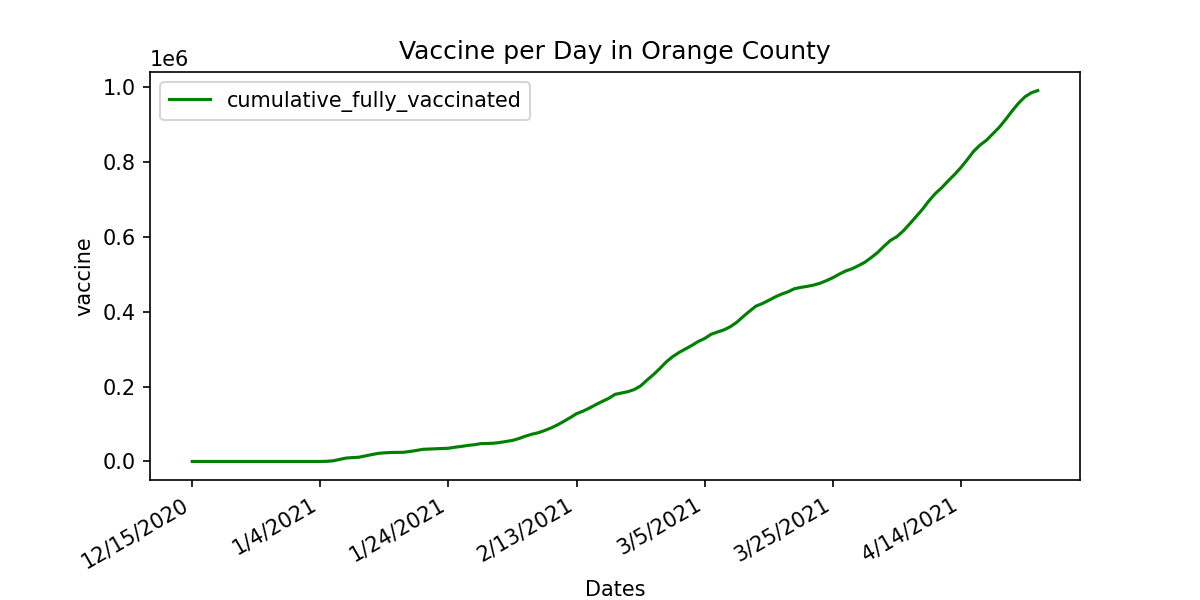

In [40]:

vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           'cumulative_fully_vaccinated',
                                           kind="line", color= "green", figsize=(8,4))
plt.title(f"Vaccine per Day in {county2} County")
plt.xlabel("Dates")
plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


<IPython.core.display.Javascript object>


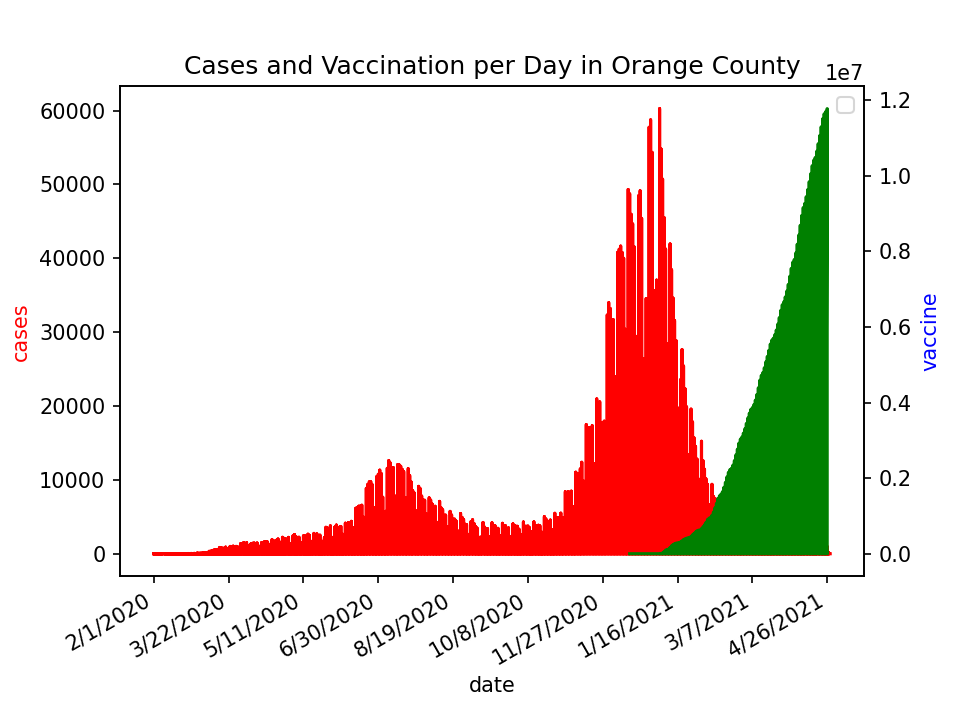

No handles with labels found to put in legend.


In [41]:
vaccine_data = vaccine_data.rename(columns={"administered_date": "date"})

merge_data = pd.merge(cases_data, vaccine_data, 
                   on='date', 
                   how='left')
  
# displaying result
merge_data

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(merge_data.date, merge_data.cases, color="red")
# set x-axis label
ax.set_xlabel("date")
# set y-axis label
ax.set_ylabel("cases",color="red")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merge_data.date, merge_data["cumulative_fully_vaccinated"],color="green")
ax2.set_ylabel("vaccine",color="blue")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.show()



#vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           #'cumulative_fully_vaccinated',
                                          # kind="line", color= "green", figsize=(8,6))
#plt.title(f"vaccine per day in {county1}")
#plt.xlabel("Dates")
#plt.ylabel("vaccine")
plt.legend()
plt.title(f"Cases and Vaccination per Day in {county2} County")
plt.gcf().autofmt_xdate()
plt.show()

<IPython.core.display.Javascript object>


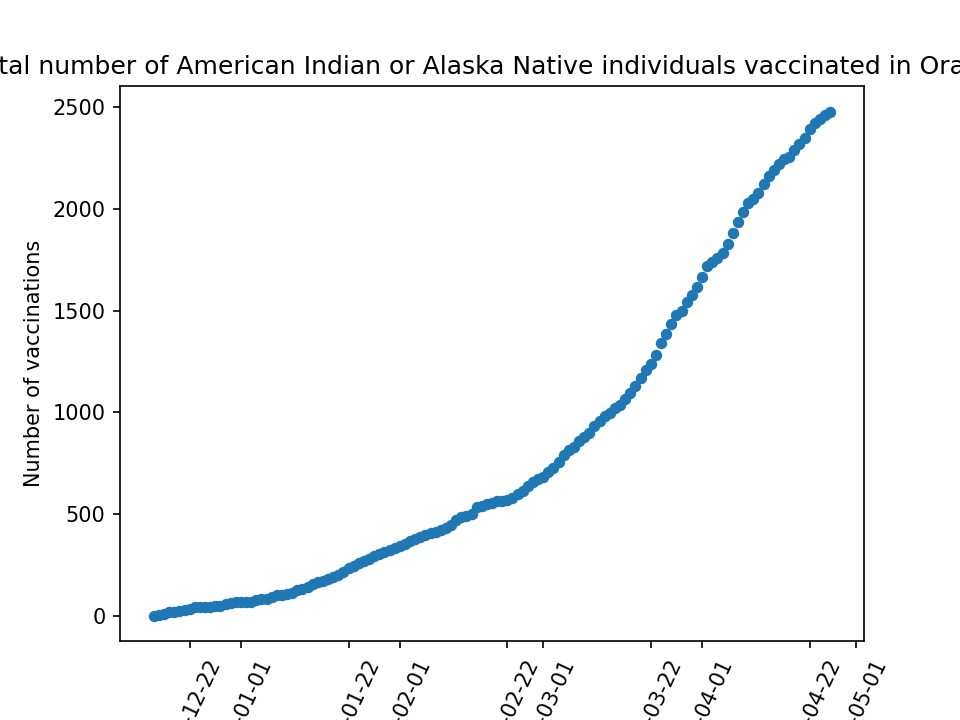

y = 18.71x + -436.73
The vaccination rate of the American Indian or Alaska Native demographic in Orange county is about 18.71089358402791 people per day
0.2708583321370572 percent of the American Indian or Alaska Native population is vaccinated per day


In [42]:
xaxis = np.arange (1.0, 134.0, 1)

demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of American Indian or Alaska Native individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")


x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)



print (line_eq)
print (f"The vaccination rate of the American Indian or Alaska Native demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the American Indian or Alaska Native population is vaccinated per day")

plt.show()


piea = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


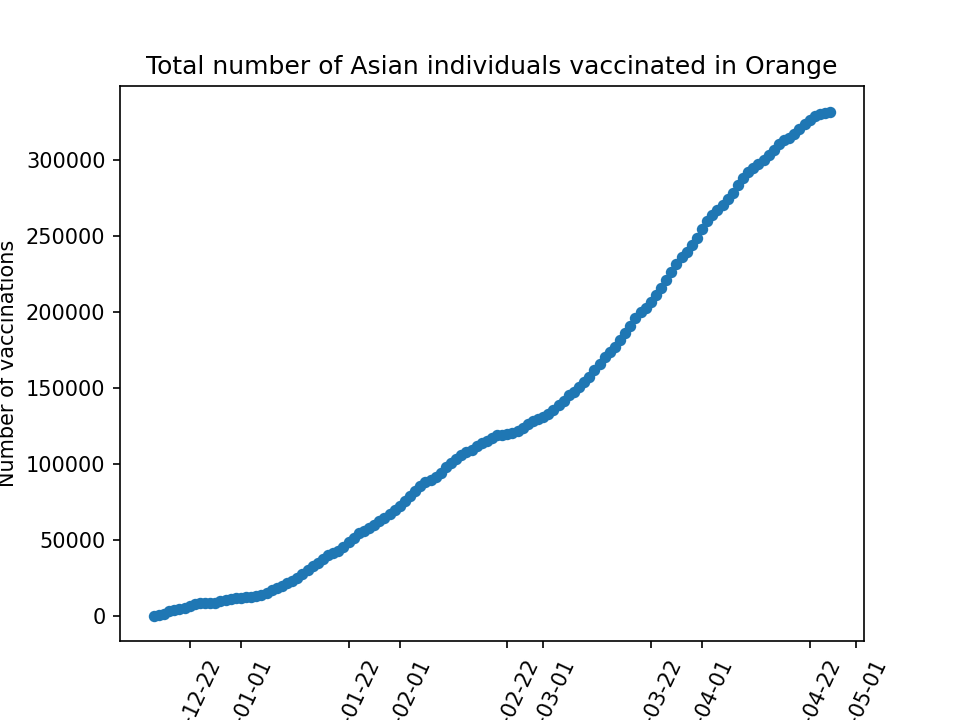

y = 2682.43x + -46759.3
The vaccination rate of the Asian demographic in Orange county is about 2682.426199487865 people per day
0.46017371276270763 percent of the Asian population is vaccinated per day


In [43]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Asian"]
xaxis = np.arange (1.0, 134.0, 1)

demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Asian individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Asian demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Asian population is vaccinated per day")

pieb = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


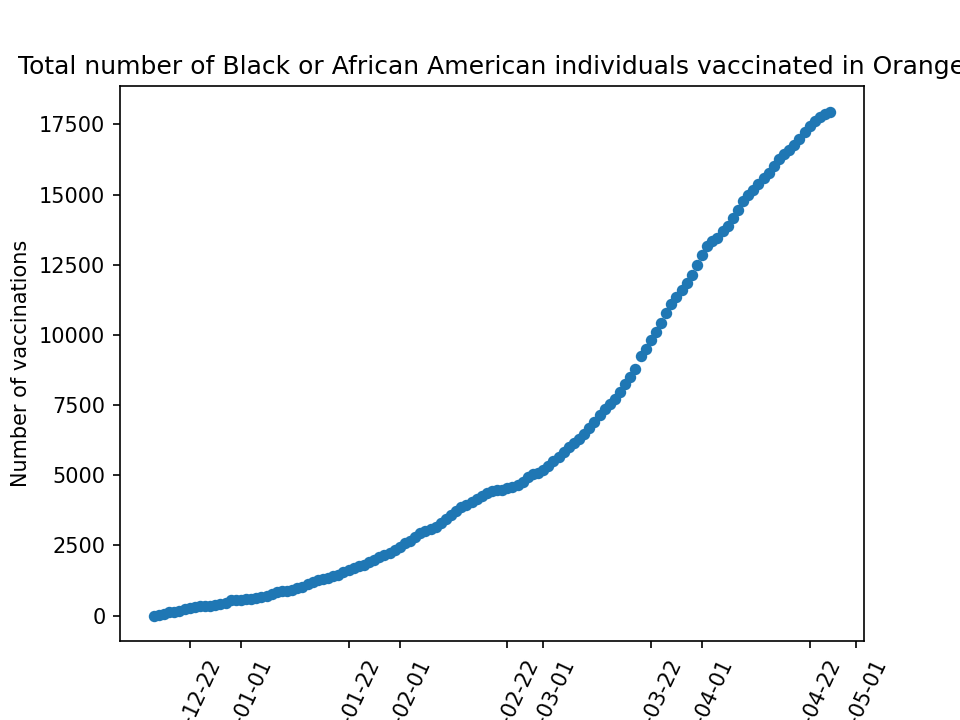

y = 139.43x + -3183.79
The vaccination rate of the Black or African American demographic in Orange county is about 139.42861733710123 people per day
0.28135567305089443 percent of the Black or African American population is vaccinated per day


In [44]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Black or African American"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Black or African American individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Black or African American demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Black or African American population is vaccinated per day")

piec = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


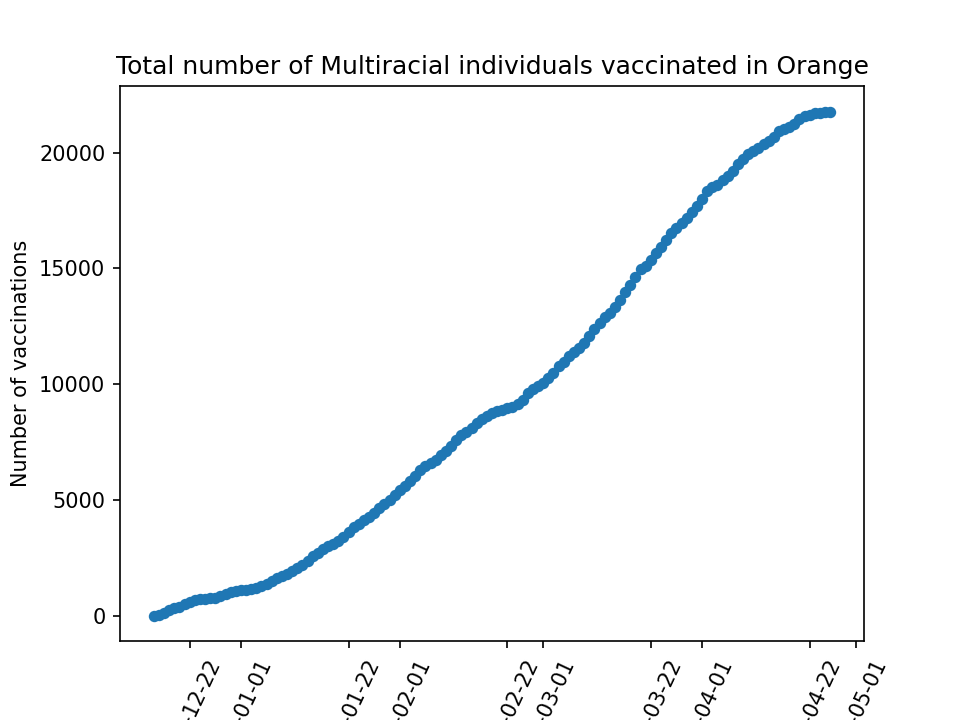

y = 183.36x + -2730.52
The vaccination rate of the Multiracial demographic in Orange county is about 183.36043806939327 people per day
0.2139461846231136 percent of the Multiracial population is vaccinated per day


In [45]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Multiracial"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Multiracial individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Multiracial demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Multiracial population is vaccinated per day")

piee = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


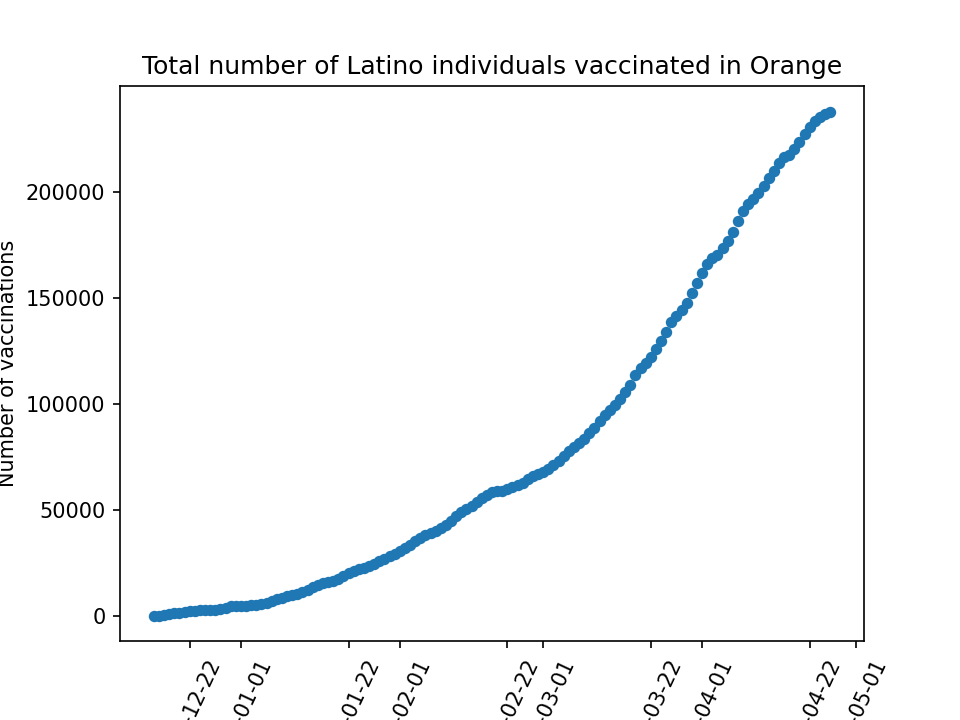

y = 1823.58x + -43487.29
The vaccination rate of the Latino demographic in Orange county is about 1823.5843696758857 people per day
0.15911395641656223 percent of the Latino population is vaccinated per day


In [46]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Latino"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Latino individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Latino demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Latino population is vaccinated per day")

pied = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


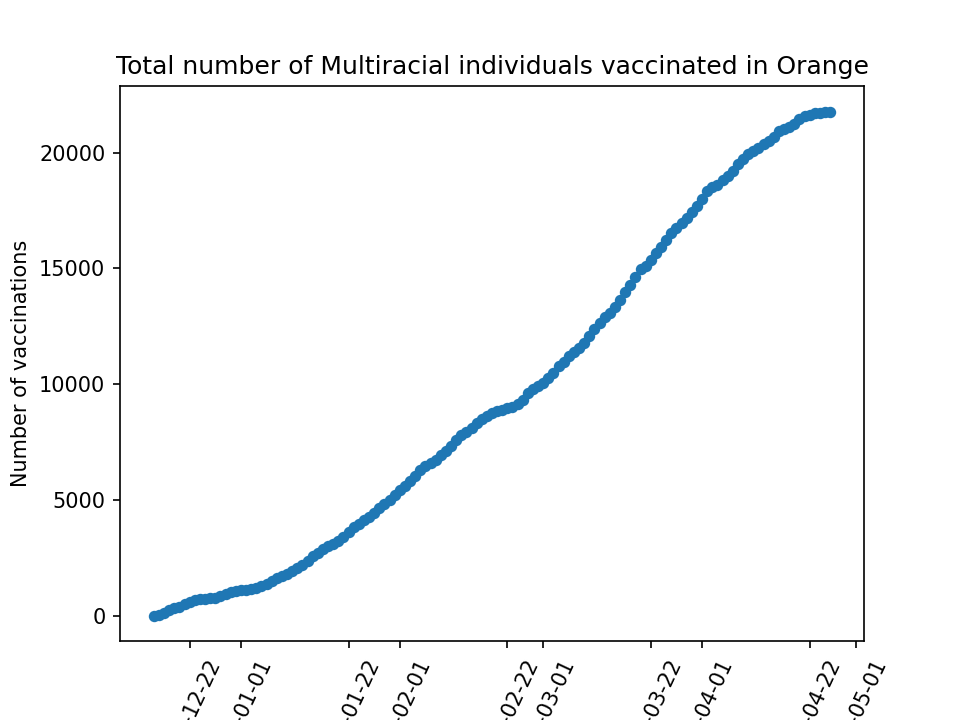

y = 183.36x + -2730.52
The vaccination rate of the Multiracial demographic in Orange county is about 183.36043806939327 people per day
0.2139461846231136 percent of the Multiracial population is vaccinated per day


In [47]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Multiracial"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Multiracial individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Multiracial demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Multiracial population is vaccinated per day")

piee = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


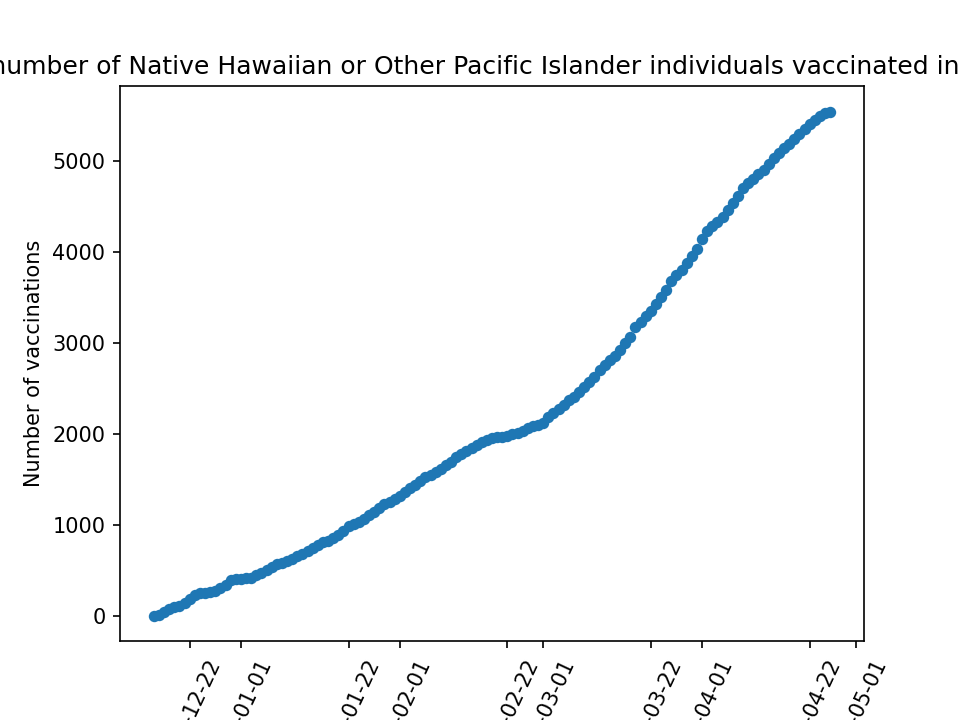

y = 42.2x + -586.37
The vaccination rate of the Native Hawaiian or Other Pacific Islander demographic in Orange county is about 42.19770763407842 people per day
0.45609281921831407 percent of the Native Hawaiian or Other Pacific Islander population is vaccinated per day


In [48]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Native Hawaiian or Other Pacific Islander"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Native Hawaiian or Other Pacific Islander individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Native Hawaiian or Other Pacific Islander demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Native Hawaiian or Other Pacific Islander population is vaccinated per day")

pief = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


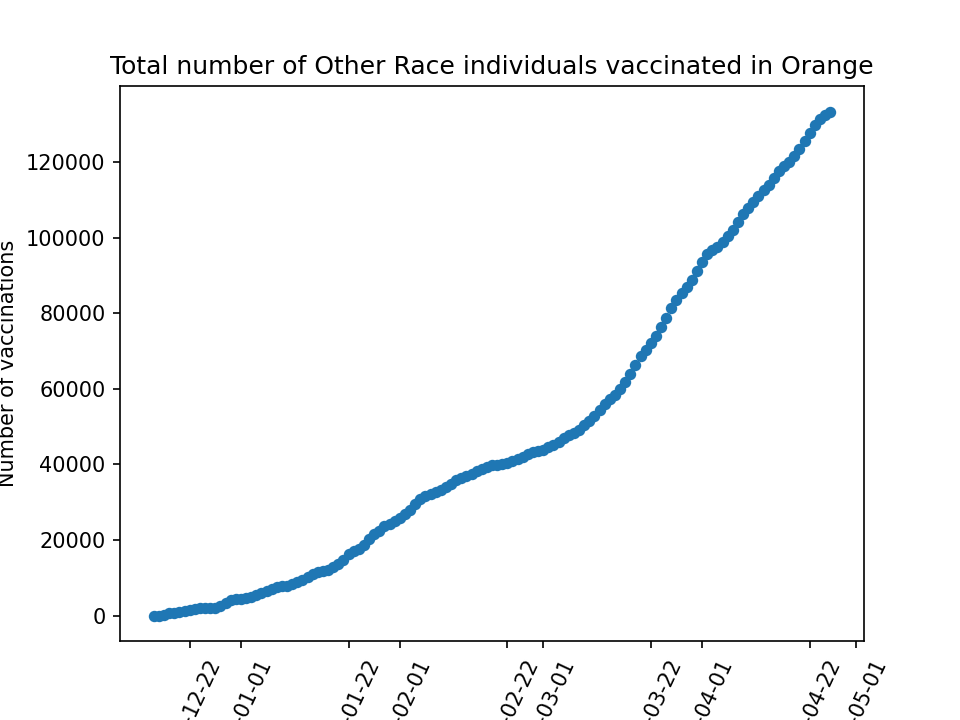

y = 1001.92x + -19412.12
The vaccination rate of the 'Other Race' demographic in Orange county is about 1001.917808428806 people per day
nan percent of the Other Race population is vaccinated per day


In [49]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Other Race"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Other Race individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the 'Other Race' demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Other Race population is vaccinated per day")

pieg = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


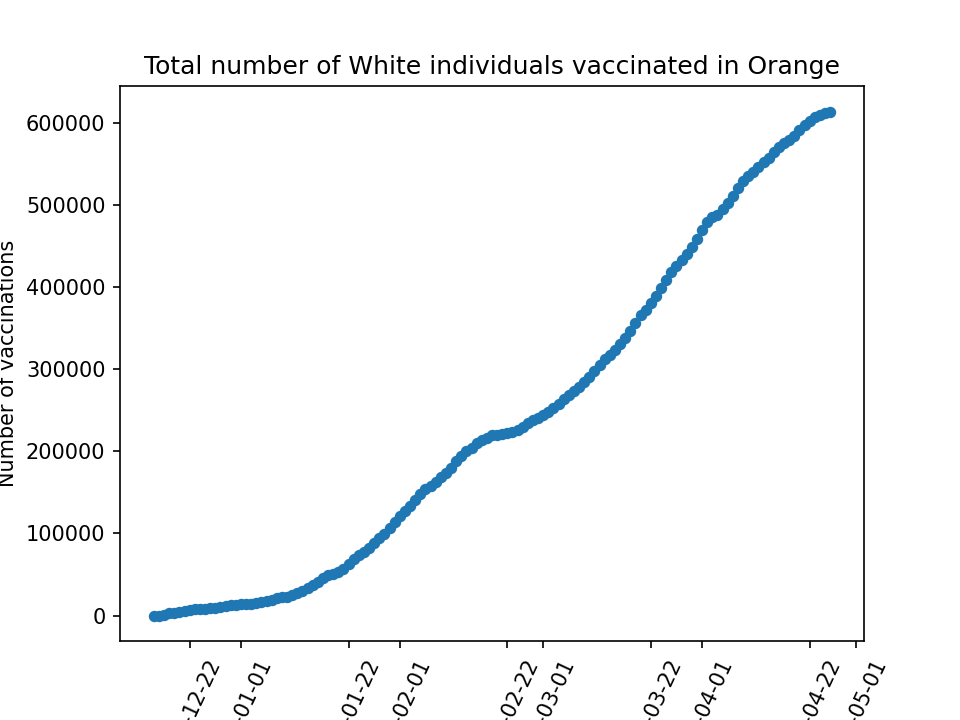

<IPython.core.display.Javascript object>


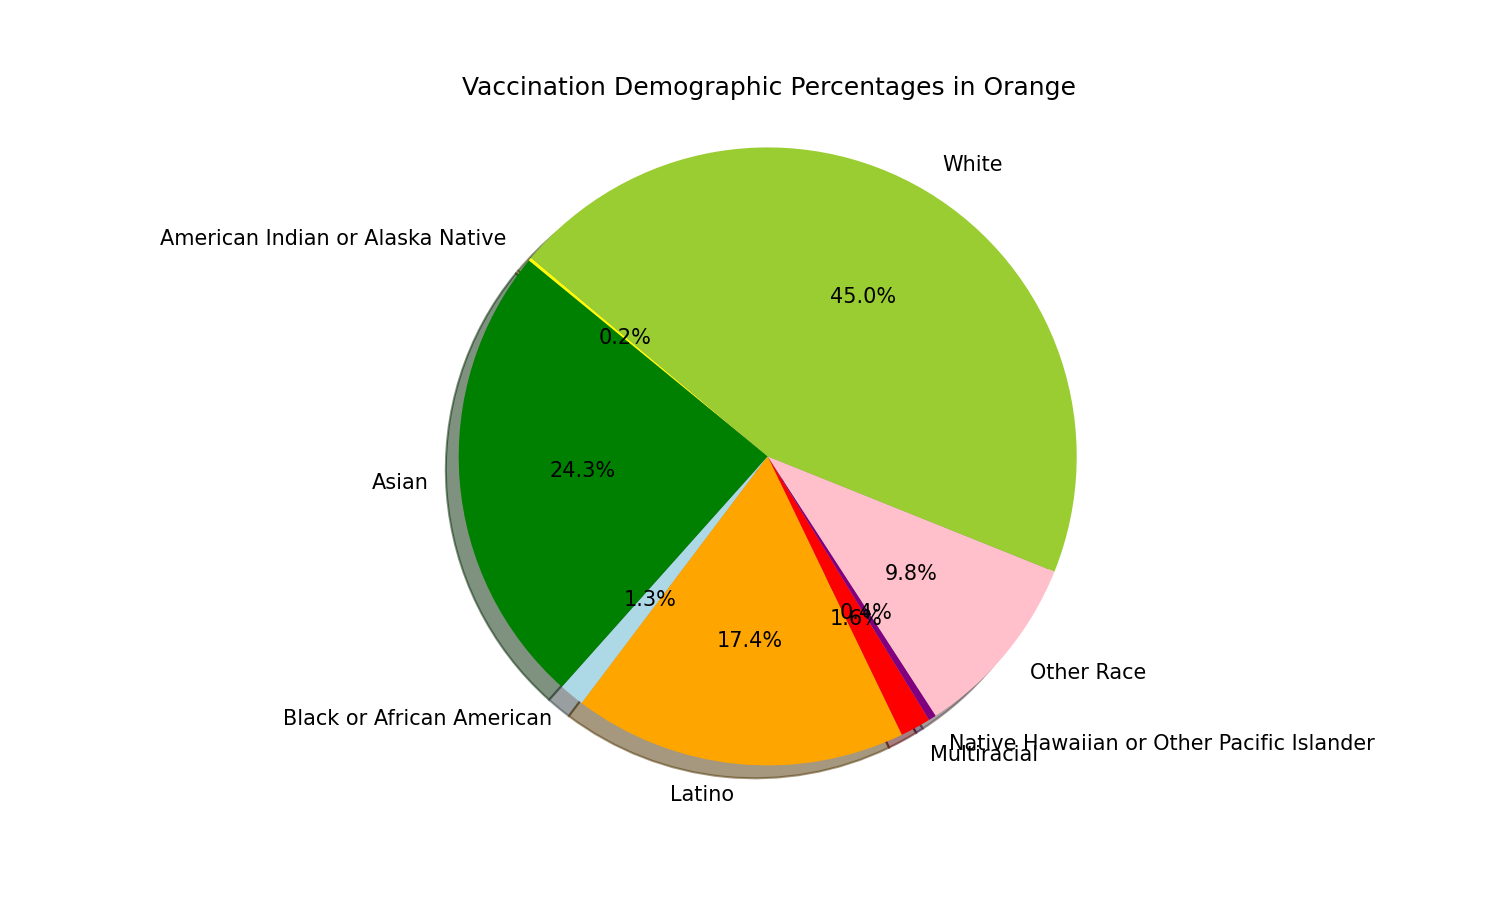

y = 5055.64x + -99378.71
The vaccination rate of the White demographic in Orange county is about 5055.643867130512 people per day
0.3804545658990951 percent of the White population is vaccinated per day


In [50]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "White"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of White individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the White demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the White population is vaccinated per day")

pieh = demo.iloc[-1, 12]

In [51]:
labels = ["American Indian or Alaska Native", "Asian", "Black or African American", "Latino", "Multiracial", "Native Hawaiian or Other Pacific Islander", "Other Race", "White"]
vaxnumbydemo = [piea, pieb, piec, pied, piee, pief, pieg, pieh]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen"]
explode = (0,0,0,0,0,0,0,0)
plt.pie(vaxnumbydemo, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title(f"Vaccination Demographic Percentages in {county2}")
plt.show()

<IPython.core.display.Javascript object>


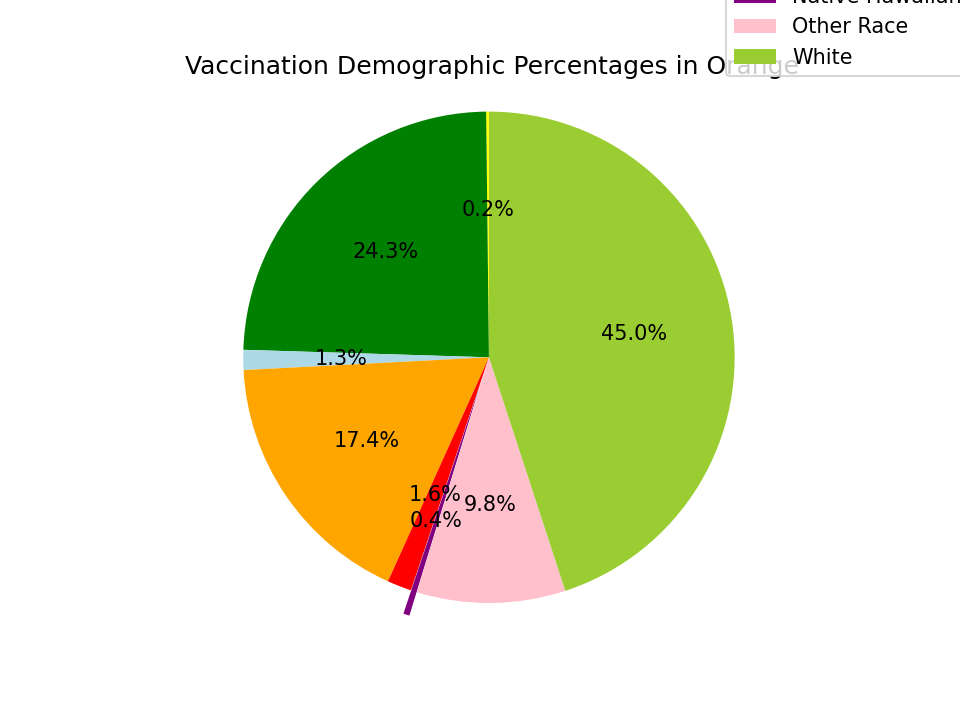

In [52]:
labels = ["American Indian or Alaska Native", "Asian", "Black or African American", "Latino", "Multiracial", "Native Hawaiian or Other Pacific Islander", "Other Race", "White"]
vaxnumbydemo = [piea, pieb, piec, pied, piee, pief, pieg, pieh]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen"]
explode = (0,0,0,0,0,.1,0,0)
fig1, ax1 = plt.subplots()
patches, texts, auto = ax1.pie(vaxnumbydemo, colors=colors, shadow=False, startangle=90,explode=explode, autopct='%1.1f%%' )
plt.axis("equal")
plt.title(f"Vaccination Demographic Percentages in {county2}")

plt.legend(patches, labels, bbox_to_anchor=(.8, 1))

plt.show()